<a href="https://colab.research.google.com/github/janhavi-giri/TDA-Clustering/blob/main/TDA_vs_Clustering_Scenario_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demystifying complex patterns: Clustering vs Topological Data Analysis (TDA)**


The code below generates a 3D Swiss Roll dataset, applies **K-Means Clustering** to it, and then uses **Persistent Homology** (a TDA method) to analyze its topological features.

The output includes two plots: one showing the **results of the K-Means** **clustering** and the other showing the **persistence diagram from TDA**. The persistence diagram helps visualize the lifespan of topological features (like loops or holes) in the data.

In [ ]:
#install TDA libraries
!pip install persim
!pip install ripser

In [2]:
#install required libraries for clustering, TDA, and setting up the environment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import KMeans
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings("ignore")

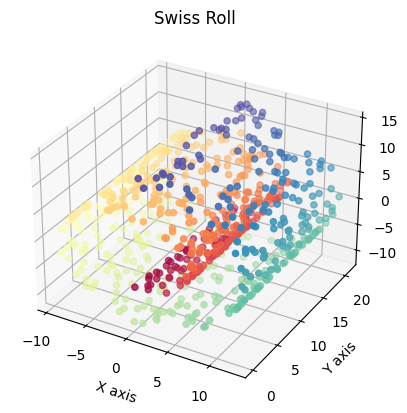

In [3]:
# Generate the Swiss Roll dataset
X, color = make_swiss_roll(n_samples=800)

# Plot the Swiss Roll
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Text(0.5, 0, 'Z axis')

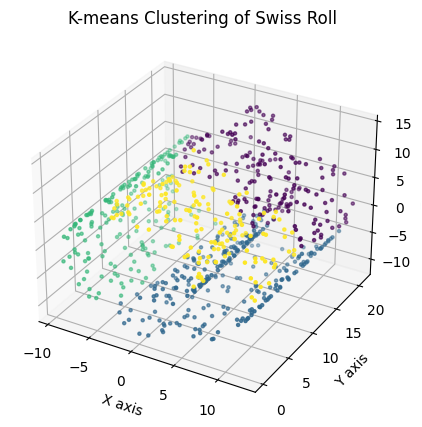

In [4]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

# Plot K-means result
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=5)
ax.set_title("K-means Clustering of Swiss Roll")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

Clustering fails to reveal the underlying structure of the swiss roll dataset. It decomposes the data into discrete segments with partial overlap thus, failing to capture the connectivity as illustrated by the spiral pattern which is a distinct feature of this dataset.





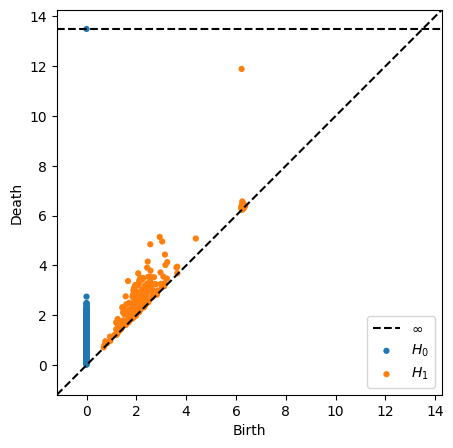

In [5]:
# Compute persistence diagram with TDA using Ripser
diagrams = ripser(X)['dgms']

# Plot TDA result
fig2 = plt.figure(figsize=(12, 5))
ax = fig2.add_subplot(122)
plot_diagrams(diagrams, show=True)

ax.set_title("Persistence Diagram (TDA)")

plt.show()

TDA utilizes Persistence Diagram as shown above to represent the topological features of the swiss roll dataset captured by the Homology groups (H_0, H_1) across different scales. Each point represents birth and death of a topological feature. The location of a point indicates both when the feature first appears (birth) and when it disappears (death). A point near the diagonal (where the death time is close to the birth time) represents a feature that doesn't persist long; it can often be considered noise. Points far from the diagonal indicate features that persist over a range of scales and are generally considered significant. In the Swiss Roll dataset, these are represented as the main coil (H_0) and loop (H_1) of the roll.






